In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [2]:
matplotlib.rcParams['figure.figsize'] = [10, 6]

In [3]:
with open ("../Data/Structure_data/MD_results/R268G_angle158_268_331.xvg") as f:
    content = f.readlines()

In [4]:
anglelist_R233H = []
for line in content:
    if line.startswith("#"):
        continue
    elif line.startswith("@"):
        continue
    else:
        time = line.split()[0]
        angle = float(line.split()[1])
        anglelist_R233H.append(angle)

In [5]:
with open ("../Data/Structure_data/MD_results/WT_angle158_268_331.xvg") as f:
    content = f.readlines()

In [6]:
anglelist_WT = []
for line in content:
    if line.startswith("#"):
        continue
    elif line.startswith("@"):
        continue
    else:
        time = line.split()[0]
        angle = float(line.split()[1])
        anglelist_WT.append(angle)

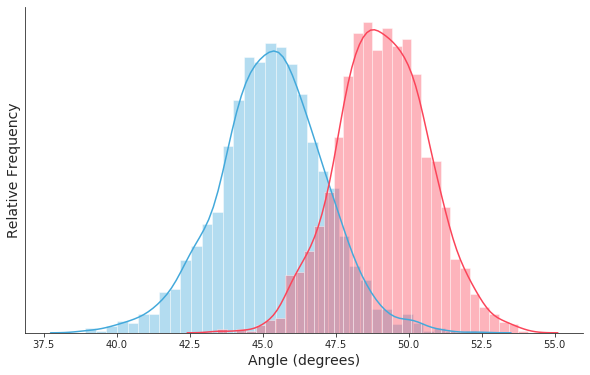

In [7]:
sns.set_style("ticks")
sns.distplot(anglelist_R233H, color = "#43A9DB")
sns.distplot(anglelist_WT, color = "#FB4459")
sns.despine()
plt.yticks([])
plt.xlabel("Angle (degrees)", size = 14)
plt.ylabel("Relative Frequency", size = 14)
plt.savefig("FigureS1_R268G_MDangles.pdf")

In [8]:
smoothed = np.convolve(anglelist_WT, np.ones(40)/40)
smoothed2 = np.convolve(anglelist_R233H, np.ones(40)/40)

In [9]:
np.convolve

<function numpy.convolve(a, v, mode='full')>

Text(0, 0.5, 'Angle (degrees)')

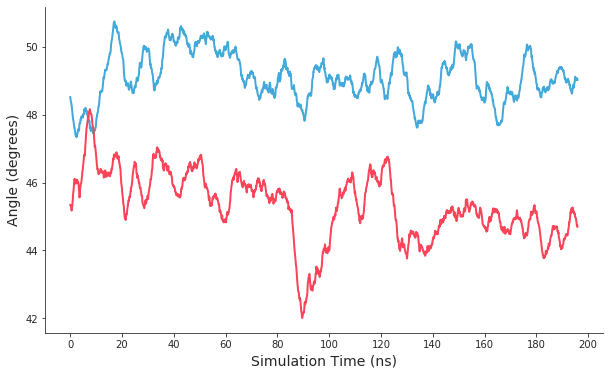

In [10]:
sns.set_style("ticks")
plt.plot(smoothed[40:2000], lw = 2, c = "#43A9DB")
plt.plot(smoothed2[40:2000], lw = 2, c = "#FB4459")
sns.despine()
plt.xticks((0,200,400,600,800,1000,1200,1400,1600,1800,2000), ("0", "20", "40", "60", "80", "100","120","140","160","180","200"))
plt.xlabel("Simulation Time (ns)", size = 14)
plt.ylabel("Angle (degrees)", size = 14)
#plt.axvline(x = 960,linewidth=4, color='grey')
#plt.savefig("WT_vs_R233_lineplot.pdf")